## Imporation des modules

In [1]:
import sys
from os import chdir
from importlib import reload

import numpy  as np
import pandas as pd

## Réprésentation graphique
import matplotlib.pyplot as plt
import graphviz
from graphviz import render
from IPython.display import Image

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn import svm
from sklearn import neighbors

## Les arbres
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

## Les réseaux de neurones
import keras

In [2]:
## Importation d'un module personnalisé
sys.path.insert(0, r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\01 - Modules')

import BetPy_Annex
reload(BetPy_Annex)

from BetPy_Annex import Build_tree

## Chargement des données

In [3]:
## Chargement des données
chdir(r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\00 - Data\Football')

match_all = pd.read_csv('match_all.csv', index_col=0)

In [4]:
## Suppression des lignes ayant des NA dans la table « match_all »
match_all = match_all.dropna()

## Création des tables « data »

> <strong>Description :</strong>
>> ...

In [5]:
## Création de la table « data » principale

##########################
## ISSUES MATCH_RESULTS ##
##########################

data                        = pd.DataFrame(match_all[['Dom_Ext', 'CLB_Nb_jours', 'ADV_Nb_jours']])

data['Écart_Série_vic']     = match_all['CLB_Série_vic']   - match_all['ADV_Série_vic']
data['Écart_Série_vic_5']   = match_all['CLB_Série_vic_5'] - match_all['ADV_Série_vic_5']
data['Écart_Série_vic_3']   = match_all['CLB_Série_vic_3'] - match_all['ADV_Série_vic_3']
data['Écart_Série_vic_1']   = match_all['CLB_Série_vic_1'] - match_all['ADV_Série_vic_1']

data['Écart_buts_diff']     = match_all['CLB_Tot_buts_diff']   - match_all['ADV_Tot_buts_diff']
data['Écart_buts_diff_5']   = match_all['CLB_Tot_buts_diff_5'] - match_all['ADV_Tot_buts_diff_5']
data['Écart_buts_diff_3']   = match_all['CLB_Tot_buts_diff_3'] - match_all['ADV_Tot_buts_diff_3']
data['Écart_buts_diff_1']   = match_all['CLB_Tot_buts_diff_1'] - match_all['ADV_Tot_buts_diff_1']

data['Écart_buts_pour']     = match_all['CLB_Tot_buts_pour']   - match_all['ADV_Tot_buts_pour']
data['Écart_buts_pour_5']   = match_all['CLB_Tot_buts_pour_5'] - match_all['ADV_Tot_buts_pour_5']
data['Écart_buts_pour_3']   = match_all['CLB_Tot_buts_pour_3'] - match_all['ADV_Tot_buts_pour_3']
data['Écart_buts_pour_1']   = match_all['CLB_Tot_buts_pour_1'] - match_all['ADV_Tot_buts_pour_1']

data['Écart_buts_contre']   = match_all['ADV_Tot_buts_contre']   - match_all['CLB_Tot_buts_contre']
data['Écart_buts_contre_5'] = match_all['ADV_Tot_buts_contre_5'] - match_all['CLB_Tot_buts_contre_5']
data['Écart_buts_contre_3'] = match_all['ADV_Tot_buts_contre_3'] - match_all['CLB_Tot_buts_contre_3']
data['Écart_buts_contre_1'] = match_all['ADV_Tot_buts_contre_1'] - match_all['CLB_Tot_buts_contre_1']

########################
## ISSUES MATCH_INFOS ##
########################

# Activité des attaquants
data['Écart_Activité_att_5'] = match_all['CLB_Act_Tot_att_3H_5'] - match_all['ADV_Act_Tot_att_3H_5']
data['Écart_Activité_att_3'] = match_all['CLB_Act_Tot_att_3H_3'] - match_all['ADV_Act_Tot_att_3H_3']
data['Écart_Activité_att_1'] = match_all['CLB_Act_Tot_att_3H_1'] - match_all['ADV_Act_Tot_att_3H_1']

# Activité des défenseurs
data['Écart_Activité_def_5'] = match_all['CLB_Act_Tot_def_3H_5'] - match_all['ADV_Act_Tot_def_3H_5']
data['Écart_Activité_def_3'] = match_all['CLB_Act_Tot_def_3H_3'] - match_all['ADV_Act_Tot_def_3H_3']
data['Écart_Activité_def_1'] = match_all['CLB_Act_Tot_def_3H_1'] - match_all['ADV_Act_Tot_def_3H_1']

# Nombre d'arrêts du gardien
data['Écart_Arrêts_5']       = match_all['CLB_Gar_Tot_3H_5'] - match_all['ADV_Gar_Tot_3H_5']
data['Écart_Arrêts_3']       = match_all['CLB_Gar_Tot_3H_3'] - match_all['ADV_Gar_Tot_3H_3']
data['Écart_Arrêts_1']       = match_all['CLB_Gar_Tot_3H_1'] - match_all['ADV_Gar_Tot_3H_1']

# Nombre de fautes des joueurs adverses dans la zone proche de leurs buts
data['Écart_Fautes_5']       = match_all['CLB_Fte_Tot_3H_5'] - match_all['ADV_Fte_Tot_3H_5']
data['Écart_Fautes_3']       = match_all['CLB_Fte_Tot_3H_3'] - match_all['ADV_Fte_Tot_3H_3']
data['Écart_Fautes_1']       = match_all['CLB_Fte_Tot_3H_1'] - match_all['ADV_Fte_Tot_3H_1']

# Nombre de passes intelligentes de la part de l'équipe
data['Écart_Passes_5']       = match_all['CLB_Pass_Tot_3H_5'] - match_all['ADV_Pass_Tot_3H_5']
data['Écart_Passes_3']       = match_all['CLB_Pass_Tot_3H_3'] - match_all['ADV_Pass_Tot_3H_3']
data['Écart_Passes_1']       = match_all['CLB_Pass_Tot_3H_1'] - match_all['ADV_Pass_Tot_3H_1']

# Nombre de tirs dans la zone proche du but adverse
data['Écart_Tirs_5']         = match_all['CLB_Tirs_Tot_3H_5'] - match_all['ADV_Tirs_Tot_3H_5']
data['Écart_Tirs_3']         = match_all['CLB_Tirs_Tot_3H_3'] - match_all['ADV_Tirs_Tot_3H_3']
data['Écart_Tirs_1']         = match_all['CLB_Tirs_Tot_3H_1'] - match_all['ADV_Tirs_Tot_3H_1']

######################
## VARIABLES CIBLES ##
######################

data['[Résultat]']           = match_all['[Résultat]']
data['[CLB_Buts]']           = match_all['[CLB_Buts]']
data['[ADV_Buts]']           = match_all['[ADV_Buts]']

In [6]:
## Affichage pour vérification
data.iloc[:2, :].T

426    427
Dom_Ext                 1.0    0.0
CLB_Nb_jours            7.0    6.0
ADV_Nb_jours            6.0    7.0
Écart_Série_vic         1.0   -1.0
Écart_Série_vic_5       1.0   -1.0
Écart_Série_vic_3       0.0    0.0
Écart_Série_vic_1       0.0    0.0
Écart_buts_diff         6.0   -6.0
Écart_buts_diff_5       5.0   -5.0
Écart_buts_diff_3      -1.0    1.0
Écart_buts_diff_1       1.0   -1.0
Écart_buts_pour         1.0   -1.0
Écart_buts_pour_5       1.0   -1.0
Écart_buts_pour_3      -1.0    1.0
Écart_buts_pour_1       0.0    0.0
Écart_buts_contre       5.0   -5.0
Écart_buts_contre_5     4.0   -4.0
Écart_buts_contre_3     0.0    0.0
Écart_buts_contre_1     1.0   -1.0
Écart_Activité_att_5  477.0 -477.0
Écart_Activité_att_3  244.0 -244.0
Écart_Activité_att_1  100.0 -100.0
Écart_Activité_def_5 -358.0  358.0
Écart_Activité_def_3   -3.0    3.0
Écart_Activité_def_1  -60.0   60.0
Écart_Arrêts_5         -1.0    1.0
Écart_Arrêts_3         -2.0    2.0
Écart_Arrêts_1         -1.0    1.0
Écart_Fautes_5         -2.0    2.0
Écart_Fautes_3          2.0   -2.0
Écart_Fautes_1         -3.0    3.0
Écart_Passes_5          5.0   -5.0
Écart_Passes_3          6.0   -6.0
Écart_Passes_1         -1.0    1.0
Écart_Tirs_5           11.0  -11.0
Écart_Tirs_3            9.0   -9.0
Écart_Tirs_1           -5.0    5.0
[Résultat]              1.0    0.0
[CLB_Buts]              1.0    0.0
[ADV_Buts]              0.0    1.0

## Préparation du Jeux De Données

In [7]:
## Sélection du JDD à utiliser
dt     = data.drop(['[Résultat]', '[CLB_Buts]', '[ADV_Buts]'], axis=1)
target = data['[Résultat]']

In [8]:
## Séparation des données pour entraînement des modèles
#  -> les données sont triées dans l'ordre où les matchs se sont déroulés
X_train, X_test, y_train, y_test = train_test_split(dt, target, test_size=.2, shuffle=False)

In [9]:
## Standardisation
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Entraînement des modèles, prédiction et évaluation
## 1. GridSearch SVM

## 2. KNN

## 3. Random Forest

In [10]:
## Instanciation du classifieur
clf = ensemble.RandomForestClassifier(n_jobs=-1)

## Entraînement
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [11]:
## Prédiction
y_pred = clf.predict(X_test_scaled)

In [12]:
## Évaluation du modèle
print("Score de la prédiction : {} %".format(int(clf.score(X_test_scaled, y_test) * 100.) / 100.))
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Score de la prédiction : 0.63 %


Classe prédite  0.0  1.0
Classe réelle           
0.0             137   76
1.0              78  135

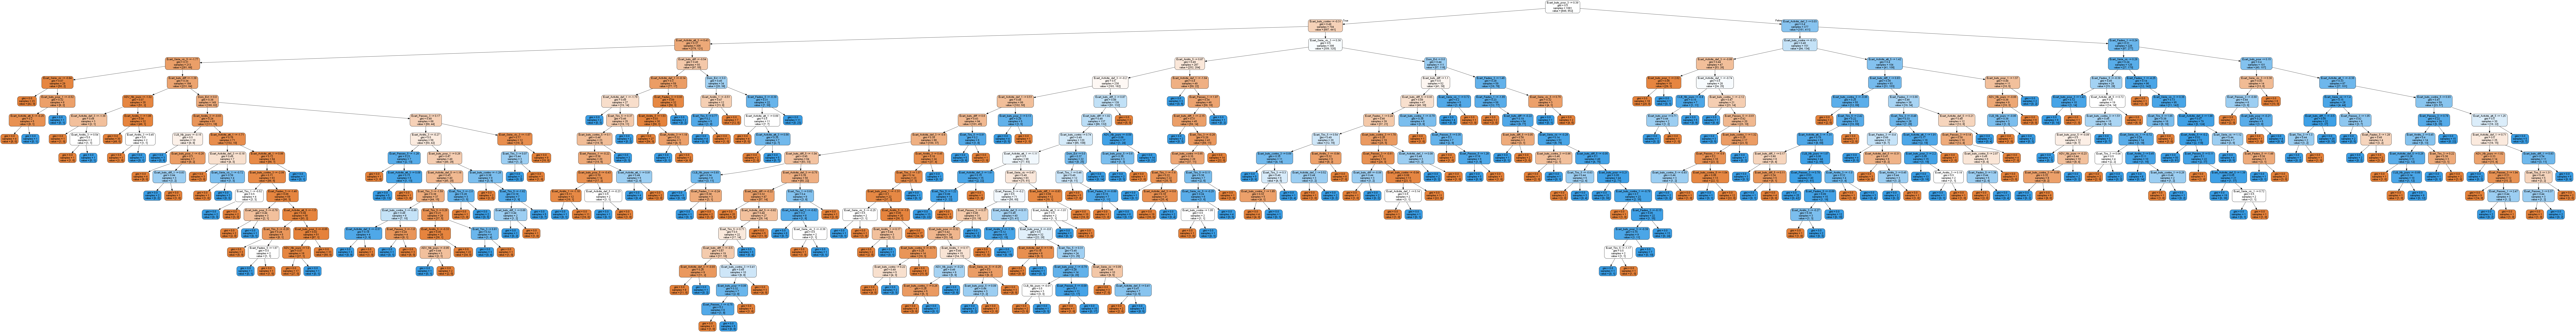

In [13]:
## Visualisation d'un arbre de la forêt
export_graphviz(clf.estimators_[0],
                feature_names=dt.columns,
                out_file='tree.dot',
                rounded=True,
                proportion=False,
                precision=2,
                filled=True
               )

render('dot', 'png', 'tree.dot')
Image(filename='tree.dot.png')

In [19]:
len(clf.estimators_)

100

In [85]:
# Récupération des éléments du premier arbre de la forêt
df_tree = pd.DataFrame(Build_tree(export_graphviz(clf.estimators_[0], feature_names=dt.columns).split(';')))

# Boucle sur le reste de la forêt
for i in range(1, len(clf.estimators_)):
    # Récupération des éléments de l'arbre courant
    df_tree = pd.concat([df_tree, pd.DataFrame(Build_tree(export_graphviz(clf.estimators_[i], feature_names=dt.columns).split(';')))])

# Suppression des informations provenant des feuilles (ayant des NA)
df_tree = df_tree.dropna()

# Ajout d'une colonne pour une meilleure estimation des variables les plus utilisées en début d'arbre
# -> plus le noeud est proche de la racine, meilleur est sont évaluation
df_tree['Éval'] = df_tree.Niveau.max() - df_tree.Niveau

In [86]:
df_tree

Type  Numéro  Parent  Niveau              Variable  Valeur   gini  \
0    Node       0      -1       0     Écart_buts_pour_3   0.389  0.500   
1    Node       1       0       1     Écart_buts_contre  -0.305  0.476   
2    Node       2       1       2  Écart_Activité_att_3   0.426  0.367   
3    Node       3       2       3     Écart_Série_vic_5  -1.772  0.308   
4    Node       4       3       4       Écart_Série_vic  -0.843  0.074   
..    ...     ...     ...     ...                   ...     ...    ...   
512  Node     512     494       4        Écart_Fautes_1   0.708  0.417   
513  Node     513     512       5  Écart_Activité_def_1   0.134  0.330   
514  Node     514     513       6        Écart_Passes_5   0.803  0.494   
515  Node     515     514       7       Écart_Série_vic   0.562  0.320   
518  Node     518     514       7        Écart_Arrêts_3  -0.997  0.375   

     samples       value  Éval  
0       1081  [848, 852]    23  
1        704  [687, 441]    22  
2        306  [378, 121]    21  
3        213   [281, 66]    20  
4         29     [50, 2]    19  
..       ...         ...   ...  
512       20     [8, 19]    19  
513       18     [5, 19]    18  
514        7      [5, 4]    17  
515        4      [4, 1]    16  
518        3      [1, 3]    16  

[25563 rows x 10 columns]

In [87]:
df_var = df_tree[df_tree.Niveau <= 2][['Variable', 'Éval']].groupby(by='Variable').sum().sort_values(by='Éval', ascending=False)

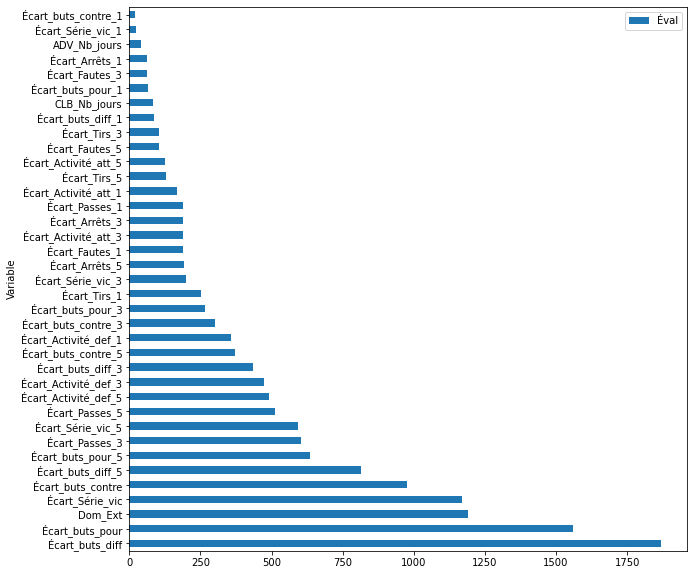

In [124]:
df_var.plot.barh(figsize=(10, 10));

In [120]:
df_var[df_var['Éval'] >= 750]

Éval
Variable               
Écart_buts_diff    1868
Écart_buts_pour    1558
Dom_Ext            1190
Écart_Série_vic    1170
Écart_buts_contre   976
Écart_buts_diff_5   814

In [136]:
# Importance par pourcentage
df_var['Éval'] / df_var['Éval'].sum() * 100.

Variable
Écart_buts_diff         12.370861
Écart_buts_pour         10.317881
Dom_Ext                  7.880795
Écart_Série_vic          7.748344
Écart_buts_contre        6.463576
Écart_buts_diff_5        5.390728
Écart_buts_pour_5        4.211921
Écart_Passes_3           4.000000
Écart_Série_vic_5        3.933775
Écart_Passes_5           3.397351
Écart_Activité_def_5     3.245033
Écart_Activité_def_3     3.125828
Écart_buts_diff_3        2.880795
Écart_buts_contre_5      2.463576
Écart_Activité_def_1     2.364238
Écart_buts_contre_3      1.993377
Écart_buts_pour_3        1.768212
Écart_Tirs_1             1.668874
Écart_Série_vic_3        1.324503
Écart_Arrêts_5           1.264901
Écart_Fautes_1           1.258278
Écart_Activité_att_3     1.258278
Écart_Arrêts_3           1.258278
Écart_Passes_1           1.251656
Écart_Activité_att_1     1.119205
Écart_Tirs_5             0.847682
Écart_Activité_att_5     0.834437
Écart_Fautes_5           0.695364
Écart_Tirs_3             0.695364
Écart

In [137]:
# Export en CSV
df_var.to_csv('Évaluation_variables.csv', sep=',')